In [1]:
#Aim: Implement Transfer Learning on the suitable public dataset (e.g., classify the cats versus dog’s
#        dataset from Kaggle or UCI or inbuilt dataset).

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 175s 19s/step - loss: 0.7471 - accuracy: 0.4850 - val_loss: 0.6523 - val_accuracy: 0.5950
Epoch 2/10
10/10 [==============================] - 202s 22s/step - loss: 0.7245 - accuracy: 0.5250 - val_loss: 0.6061 - val_accuracy: 0.7010
Epoch 3/10
10/10 [==============================] - 188s 20s/step - loss: 0.6848 - accuracy: 0.5650 - val_loss: 0.5975 - val_accuracy: 0.6770
Epoch 4/10
10/10 [==============================] - 170s 18s/step - loss: 0.6061 - accuracy: 0.6500 - val_loss: 0.5825 - val_accuracy: 0.6930
Epoch 5/10
10/10 [==============================] - 191s 21s/step - loss: 0.6420 - accuracy: 0.6250 - val_loss: 0.5570 - val_accuracy: 0.7430
Epoch 6/10
10/10 [==============================] - 201s 22s/step - loss: 0.6462 - accuracy: 0.5750 - val_loss: 0.5632 - val_accuracy: 0.6970
Epoch 7/10
10/10 [==============================] - 173s 19s/ste

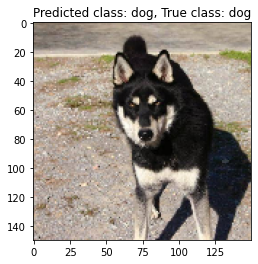

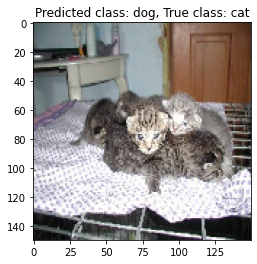

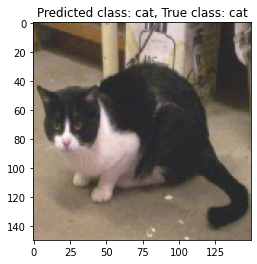

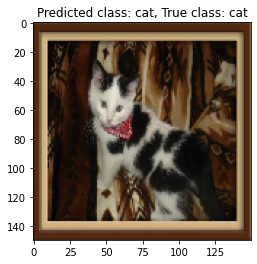

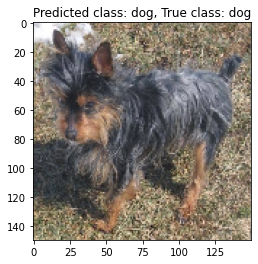

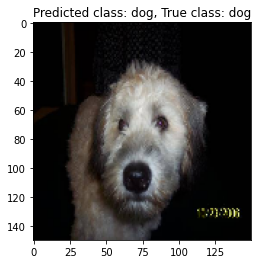

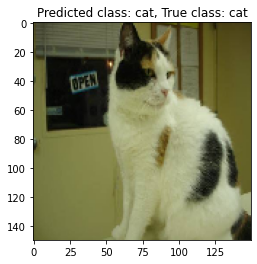

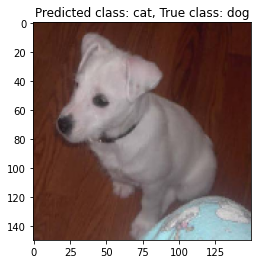

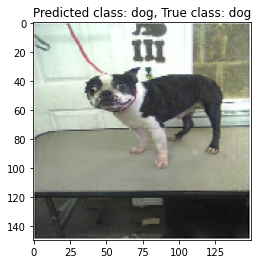

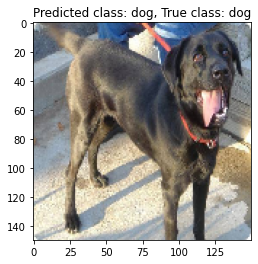

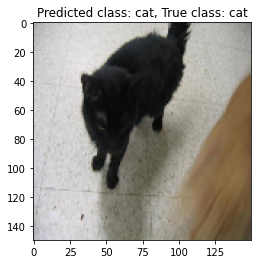

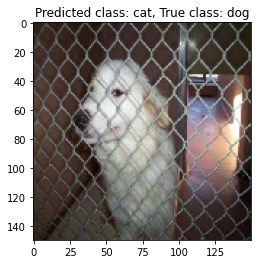

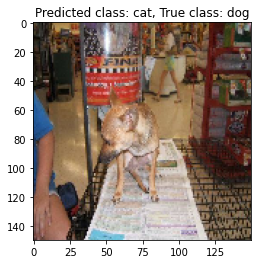

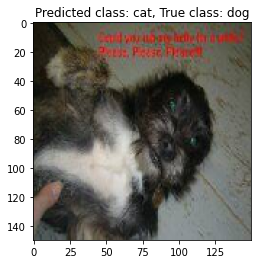

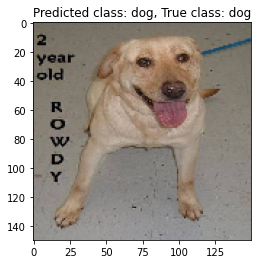

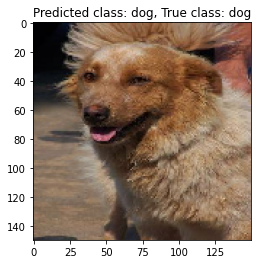

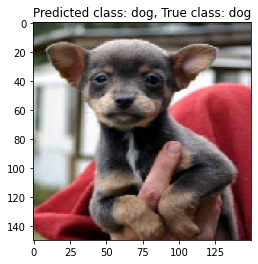

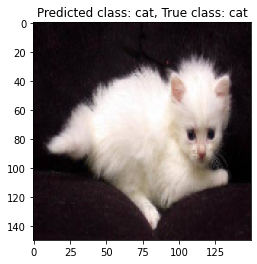

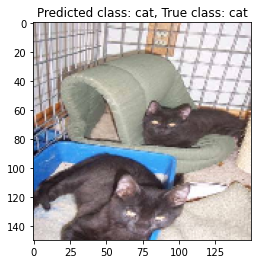

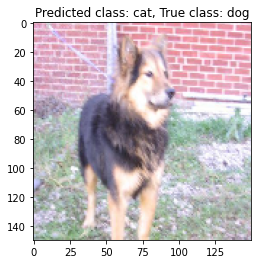

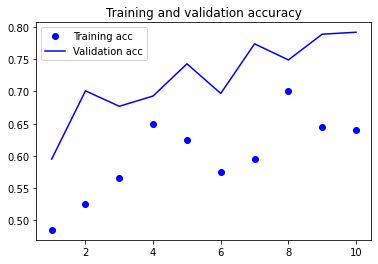

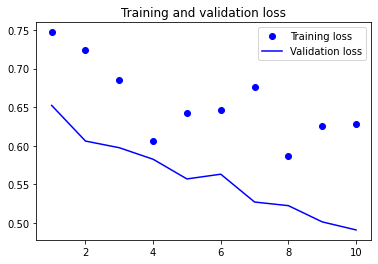

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Download and extract dataset
#url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
#filename = os.path.join(os.getcwd(),"cats_and_dogs_filtered.zip")
#tf.keras.utils.get_file(filename,url)

#with zipfile.ZipFile("cats_and_dogs_filtered.zip","r") as zip_ref:#
#    zip_ref.extractall()

# Define data generators
train_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered","train")
validation_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered","validation")

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150,150),batch_size=20,class_mode="binary")

# Load pre-trained VGG16 model
conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(150, 150, 3))

# Freeze convolutional base layers
conv_base.trainable = False

# Build model on top of the convolutional base
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=["accuracy"])

# Train model
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

# Show sample input and its predicted class
x, y_true = next(validation_generator)
y_pred = model.predict(x)
class_names = ['cat', 'dog']
for i in range(len(x)):
    plt.imshow(x[i])
    plt.title(f'Predicted class: {class_names[int(round(y_pred[i][0]))]}, True class: {class_names[int(y_true[i])]}')
    plt.show()

# Plot accuracy and loss over time
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]       
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()
